In [1]:
import matplotlib.pyplot as plt
import numpy as np

from thermohl import solver
from thermohl.solver.enums.heat_equation_type import HeatEquationType
from thermohl.solver.enums.variable_type import VariableType
from thermohl.solver.enums.temperature_location import TemperatureLocation

This function plots conductor temperatures (surface, average and core) when a step of transit occurs. Simulation made with the 3t solver and RTE power terms.

In [2]:
def example_solver3t_transient(dic):
    # create solver with rte power terms and 3t heat equation
    slvr = solver.rte(dic, heat_equation=HeatEquationType.WITH_THREE_TEMPERATURES)

    # change solver args to get initial state, compute initial values of surface
    # and core temperature using steady temperature
    slvr.args[VariableType.TRANSIT.value] = 400.0
    slvr.update()
    dtstdy = slvr.steady_temperature()
    T_surf = dtstdy[TemperatureLocation.SURFACE].values
    T_core = dtstdy[TemperatureLocation.CORE].values

    # restore initial transit in dic
    slvr.args[VariableType.TRANSIT.value] = dic[VariableType.TRANSIT.value]
    slvr.update()

    # compute temperature
    dtemp = slvr.transient_temperature(
        t,
        surface_temperature_0=T_surf,
        core_temperature_0=T_core,
        return_power=True,
    )

    # plot
    fig, ax = plt.subplots(nrows=1, ncols=1)
    tm = t / 60
    ax.fill_between(
        tm, dtemp[TemperatureLocation.SURFACE], dtemp[TemperatureLocation.SURFACE], fc="gray", alpha=0.33, ec=None
    )
    ax.plot(tm, dtemp[TemperatureLocation.SURFACE], c="C0", label="Surface Conductor temperature (C)")
    ax.plot(tm, dtemp[TemperatureLocation.AVERAGE], c="C1", label="average Conductor temperature (C)")
    ax.plot(tm, dtemp[TemperatureLocation.CORE], c="C3", label="Core Conductor temperature (C)")
    ax.set_xlabel("Time (hour)")
    ax.set_ylabel("Temperature (C)")
    ax.grid(True)
    ax.legend()
    %matplotlib inline
    plt.show()

In [3]:
import matplotlib

matplotlib.use("TkAgg")
plt.close("all")

# Generate input dict (for the sake of simplicity, only a few inputs are
# used, the rest is filled with default values).
dic = dict(
    latitude=46.1,
    altitude=123.0,
    azimuth=31.0,
    month=6,
    day=20,
    hour=0.0,
    transit=700.0,
)
t = np.linspace(0, 3600, 901)

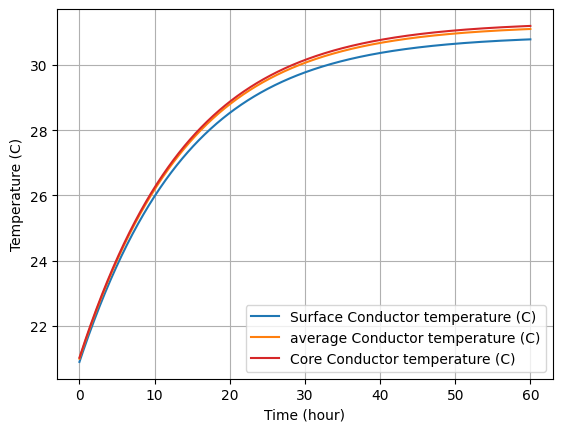

invalid command name "125130297062400process_stream_events"
    while executing
"125130297062400process_stream_events"
    ("after" script)


In [4]:
example_solver3t_transient(dic)